In [1]:
import os
import requests

In [3]:
def download_file(url, destination_folder, file_name):

    os.makedirs(destination_folder, exist_ok=True)
    path_to_write = f"{destination_folder}/{file_name}"
    response = requests.get(url)

    if response.status_code == 200:
        with open(path_to_write, 'wb') as file:
            file.write(response.content)
        print(f"File downloaded and saved to: {path_to_write}")
    else:
        print(f"Failed to download the file, status code: {response.status_code}")

In [4]:
chosen_model = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
download_tar = 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'
destination_folder = "../train/pretrained_models"
model_file_name = 'sam_vit_h_4b8939.pth'

In [5]:
download_file(download_tar, destination_folder, model_file_name)

File downloaded and saved to: ../train/pretrained_models/sam_vit_h_4b8939.pth


In [8]:
CHECKPOINT_PATH = '../train/pretrained_models/sam_vit_h_4b8939.pth'

In [9]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [11]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [12]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [13]:
import os

IMAGE_PATH = "../data/panel_1.JPG"
print(IMAGE_PATH)

../data/panel_1.JPG


In [ ]:
# LONG PROCESS
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

In [15]:
print(sam_result[0].keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


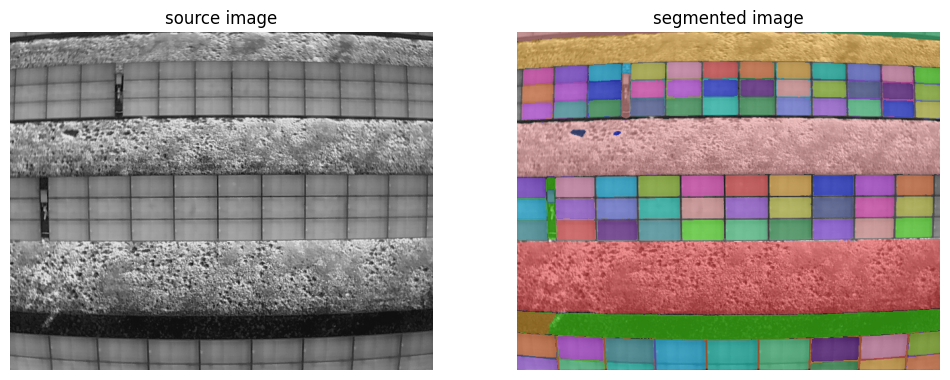

In [16]:
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)